# Plotting Ternary Phase Diagrams and Using Triangular Axes

Often in thermodynamics, it is useful to use a two dimensional plot to express equilibria in a three component system with fixed potentials. The `ternplot` API provides a straightforward way to calculate equilibria and generate ternary phase diagrams. Alternatively, if you already have an equilibrium calculation, you can directly import and use `eqplot`.

## ternplot

Here we will use the ternplot API to plot an isothermal section of the Al-Cu-Y system from the thermodynamic database found at the [NIST CALPHAD assessments](http://hdl.handle.net/11115/101) assessed by Zhang et al. [Calphad 35 (2011)](https://doi.org/10.1016/j.calphad.2011.09.008).

CPU times: user 22.7 s, sys: 130 ms, total: 22.8 s
Wall time: 22.9 s


<TriangularAxes: title={'center': 'Al-Cu-Y'}, xlabel='X(AL)', ylabel='X(Y)'>

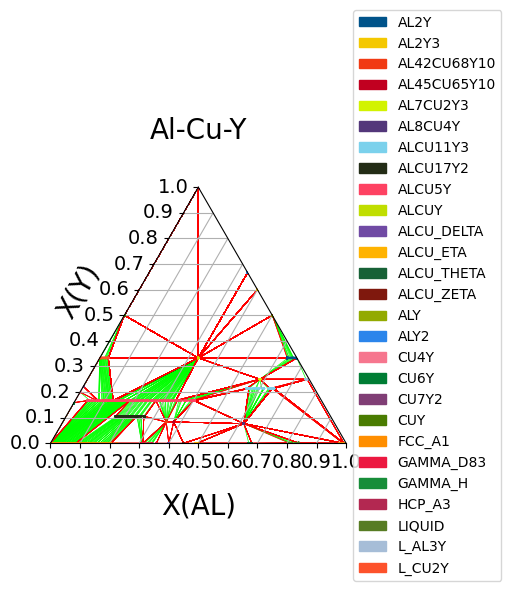

In [1]:
%matplotlib inline
from pycalphad import Database, ternplot
from pycalphad import variables as v

db_al_cu_y = Database('Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
phases = list(db_al_cu_y.phases.keys())
conds = {v.T: 830, v.P:101325, v.X('AL'): (0,1,0.015), v.X('Y'): (0,1,0.015)}

%time ternplot(db_al_cu_y, comps, phases, conds, x=v.X('AL'), y=v.X('Y'))

## Molar Ratios and Linear Combination Conditions

In [6]:
from pycalphad import Database, Workspace, variables as v

db_al_cu_y = Database('Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
phases = list(db_al_cu_y.phases.keys())
conds = {v.T: 830, v.P:101325,
         v.X('AL')/v.X('CU'): 5, # molar ratio condition
         0.1 * v.X('Y') + v.X('AL'): 0.6} # linear combination of mole fractions condition
wks = Workspace(db_al_cu_y, comps, phases, conds)
print(wks.get('X(AL)', 'X(CU)', 'X(Y)'))

[array(0.56818182), array(0.11363636), array(0.31818182)]
